## Human atlas

In [ ]:
!wget https://figshare.com/ndownloader/articles/14267219/versions/4
!unzip human.zip -d /public3/xiongyy/analysis/human_atlas
!mv /public3/xiongyy/analysis/human_atlas/TS_stromal.h5ad.zip /public3/xiongyy/analysis/shit

In [ ]:
import os
def get_file(path):          #获取文件路径
    res=[]
    for root, dirs, files in os.walk(path):
        for file in files:
            #print(file)     #文件名
            res.append(os.path.join(root,file))
    return res
get_file('/public3/xiongyy/analysis/human_atlas')

In [ ]:
import anndata
import scanpy as sc
import os

def find_gene(path):
  name=path.split('/')[-1].split('.')[0]
  print('...unzip',name)
  os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(path))
  adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
  sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
  adata=adata[:,adata.var['highly_variable']==True]
  gene=adata.var.index.tolist()
  print('...get gene')
  del adata
  os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
  print('...del')
  return gene



In [ ]:
def clear():
  for key, value in globals().items():
    if callable(value) or value.__class__.__name__ == "module":
      continue
    del globals()[key]


In [ ]:
import gc
ret_gene=find_gene('/public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip')
gc.collect()

In [ ]:
gene_dict={}
import gc
for i in get_file('/public3/xiongyy/analysis/human_atlas'):
    name=i.split('/')[-1].split('.')[0]
    print('...unzip',name)
    os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(i))
    adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
    adata=adata[:,adata.var['highly_variable']==True]
    gene=adata.var.index.tolist()
    print('...get gene')
    #adata.__delete__()
    del adata
    gc.collect()
    os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
    print('...del')

    gene_dict[name]=gene
    ret_gene=list(set(ret_gene) & set(gene))

In [ ]:
name_ret=[]
test=get_file('/public3/xiongyy/analysis/human_atlas')
for i in test:
  name=i.split('/')[-1].split('.')[0]
  name_ret.append(name)
name_ret

In [ ]:
r_gene=gene_dict['TS_Muscle']
for i in gene_dict.keys():
  r_gene=list(set(r_gene) | set(gene_dict[i]))
  print(i,len(r_gene))

In [ ]:
import pandas as pd
import numpy as np
arr=np.zeros((len(r_gene),len(name_ret)))
r_pd=pd.DataFrame(arr,index=r_gene,columns=name_ret)
for i in gene_dict.keys():
  r_pd.loc[gene_dict[i],i]=1
r_pd.head()

In [ ]:
res=r_pd.sum(axis=1)
res

In [ ]:
with open('human_ret_gene_high_10276.txt','w') as f:
  for i in res[res.values>=10].index:
    f.write(i+'\n')

In [ ]:
#os.system("unzip {0} -d /content/human".format('/content/human_h5ad/TS_Lung.h5ad.zip'))
adata=anndata.read_h5ad('/content/human/TS_germ_line.h5ad')
adata

In [ ]:
array=adata.X.toarray()
adata.X=adata.layers['raw_counts']
sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")

In [ ]:
adata=adata[:,adata.var['highly_variable']==True]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

In [ ]:
re_dict={'0-10':0,
        '10-20':0,
         '20-30':0,
         '30-40':0,
         '40-50':0,
         '50-60':0,
         '60-70':0,
         '70-80':0,
         '80-90':0,
         '90-100':0,
        }
for i in np.array(np.median(adata[:,:].X.toarray(),axis=0)/adata[:,:].X.max(axis=0).toarray())[0]:
    if i<0.1:
        re_dict['0-10']+=1
    elif i<0.2:
        re_dict['10-20']+=1
    elif i<0.3:
        re_dict['20-30']+=1
    elif i<0.4:
        re_dict['30-40']+=1
    elif i<0.5:
        re_dict['40-50']+=1
    elif i<0.6:
        re_dict['50-60']+=1
    elif i<0.7:
        re_dict['60-70']+=1
    elif i<0.8:
        re_dict['70-80']+=1
    elif i<0.9:
        re_dict['80-90']+=1
    elif i<1:
        re_dict['90-100']+=1

In [ ]:
#re_dicts={}
import gc
import numpy as np
human_std={}
human_median={}
human_max={}
human_min={}
human_mean={}
for p in get_file('/public3/xiongyy/analysis/human_atlas'):
    name=p.split('/')[-1].split('.')[0]

    print('...unzip',name)
    os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(p))
    adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
    adata.X=adata.layers['raw_counts']
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
    adata=adata[:,adata.var['highly_variable']==True]
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)

    print('...stats')
    array=adata.X.toarray()
    del adata
    gc.collect()
    human_std[name]=np.std(array,axis=0)
    human_median[name]=np.median(array,axis=0)
    human_max[name]=np.max(array,axis=0)
    human_min[name]=np.min(array,axis=0)
    human_mean[name]=np.mean(array,axis=0)

    #adata.__delete__()

    del array
    gc.collect()
    os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
    print('...del')

  #re_dicts[name]=re_dict
  #ret_gene=list(set(ret_gene) & set(gene))

In [ ]:
for i in human_std.keys():
    if type(human_std[i])==list:
        continue
    human_std[i]=human_std[i].tolist()
    human_median[i]=human_median[i].tolist()
    human_max[i]=human_max[i].tolist()
    human_min[i]=human_min[i].tolist()
    human_mean[i]=human_mean[i].tolist()

In [ ]:
del human_std['TabulaSapiens']
del human_median['TabulaSapiens']
del human_max['TabulaSapiens']
del human_min['TabulaSapiens']
del human_mean['TabulaSapiens']

In [ ]:
del_name='TS_endothelial'
del human_std[del_name]
del human_median[del_name]
del human_max[del_name]
del human_min[del_name]
del human_mean[del_name]

In [ ]:
import json

dict_json=json.dumps(human_std)#转化为json格式文件
with open('human_std.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_median)#转化为json格式文件
with open('human_median.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_max)#转化为json格式文件
with open('human_max.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_min)#转化为json格式文件
with open('human_min.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_mean)#转化为json格式文件
with open('human_mean.json','w+') as file:
    file.write(dict_json)    

## Visualize

In [1]:
import json

def load_dict_from_json(filename):
    with open(filename, 'r') as file:
        dict_json = file.read()
        loaded_dict = json.loads(dict_json)  # Load the JSON format into a dictionary
    return loaded_dict

# Load each dictionary using the function
human_std = load_dict_from_json('data/human_std.json')
human_median = load_dict_from_json('data/human_median.json')
human_max = load_dict_from_json('data/human_max.json')
human_min = load_dict_from_json('data/human_min.json')
human_mean = load_dict_from_json('data/human_mean.json')

# Now you have the dictionaries loaded from the JSON files


In [ ]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

In [138]:
import omicverse as ov
ov.utils.ov_plot_set()

In [7]:
import pandas as pd
import numpy as np
std_df=pd.DataFrame(columns=['var'])
for i in human_std.keys():
    a=np.std(human_std[i])
    std_df.loc[i]={'var':a}
std_df.head()

,var
TS_Bladder,0.183362
TS_Blood,0.166759
TS_Bone_Marrow,0.127952
TS_Eye,0.206870
TS_Fat,0.216554


In [8]:
from scipy import stats
human_max_pd=pd.DataFrame(index=human_max.keys())
for i in human_max.keys():
    human_max_test=[]
    mu_i=np.mean(human_max[i])
    sigma_i=np.std(human_max[i])
    count_i,bins_i=np.histogram(human_max[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_max.keys():
        mu_j=np.mean(human_max[j])
        sigma_j=np.std(human_max[j])
        count_j,bins_j=np.histogram(human_max[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_max_test.append(stats.spearmanr(y_i,y_j)[0])
    human_max_pd[i]=human_max_test
human_max_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.982446,0.991043,0.958486,0.998614,0.991776,0.984450,0.945778,0.939068,0.970984,...,0.970006,0.998567,0.998614,0.917915,0.991043,0.975236,0.998567,0.975236,0.939068,0.970984
TS_Blood,0.982446,1.000000,0.998451,0.895923,0.971928,0.952615,0.937787,0.877997,0.868923,0.998404,...,0.913314,0.990751,0.971928,0.841654,0.998451,0.921724,0.990751,0.921724,0.868923,0.998404
TS_Bone_Marrow,0.991043,0.998451,1.000000,0.916680,0.983017,0.967094,0.954292,0.900128,0.891672,0.993803,...,0.932510,0.996669,0.983017,0.865976,1.000000,0.940070,0.996669,0.940070,0.891672,0.993803
TS_Eye,0.958486,0.895923,0.916680,1.000000,0.971171,0.985871,0.992790,0.998893,0.997566,0.872860,...,0.998847,0.943494,0.971171,0.990879,0.916680,0.997402,0.943494,0.997402,0.997566,0.872860
TS_Fat,0.998614,0.971928,0.983017,0.971171,1.000000,0.997041,0.992068,0.960163,0.954234,0.958066,...,0.980804,0.994455,1.000000,0.935143,0.983017,0.985020,0.994455,0.985020,0.954234,0.958066


In [25]:
data_dict=dict(zip(human_max_pd.index,sc.pl.palettes.zeileis_28))

In [70]:
data_df = pd.DataFrame(data_dict.items(), columns=['index', 'Tissue'])
data_df=data_df.set_index(data_df.columns[0])

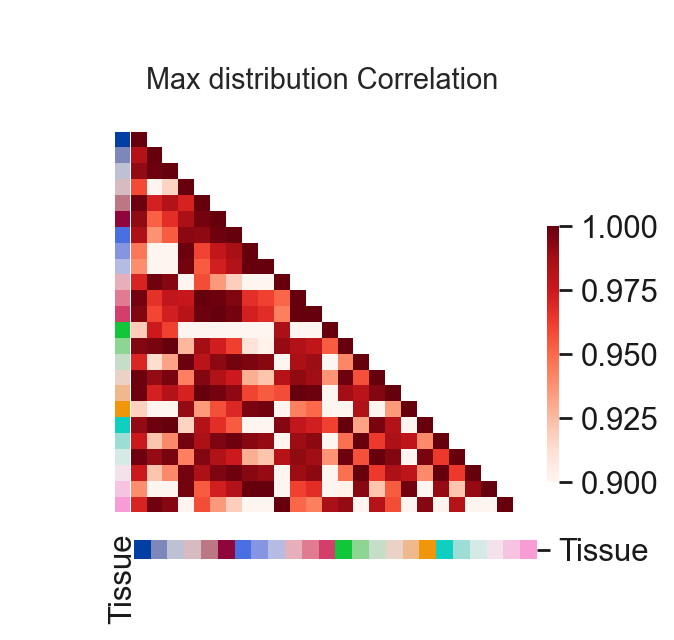

In [158]:
g=sns.clustermap(human_max_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.205, 0.13, 0.63, 0.03]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.fig.suptitle('Max distribution Correlation',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig_max_cor.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_max_cor.pdf",dpi=300,bbox_inches = 'tight')

In [78]:
from scipy import stats
human_median_pd=pd.DataFrame(index=human_median.keys())
for i in human_median.keys():
    human_median_test=[]
    mu_i=np.mean(human_median[i])
    sigma_i=np.std(human_median[i])
    count_i,bins_i=np.histogram(human_median[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_median.keys():
        mu_j=np.mean(human_median[j])
        sigma_j=np.std(human_median[j])
        count_j,bins_j=np.histogram(human_median[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_median_test.append(stats.spearmanr(y_i,y_j)[0])
    human_median_pd[i]=human_median_test
human_median_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Blood,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Bone_Marrow,0.985450,0.985450,1.000000,0.985450,0.985439,0.985439,0.985439,0.985450,0.985450,0.985462,...,0.985450,0.985450,0.985450,0.985450,0.985450,0.985450,0.985439,0.985450,0.985450,0.985415
TS_Eye,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Fat,0.999988,0.999988,0.985439,0.999988,1.000000,1.000000,1.000000,0.999988,0.999988,0.999977,...,0.999988,0.999988,0.999988,0.999988,0.999988,0.999988,1.000000,0.999988,0.999988,0.999988


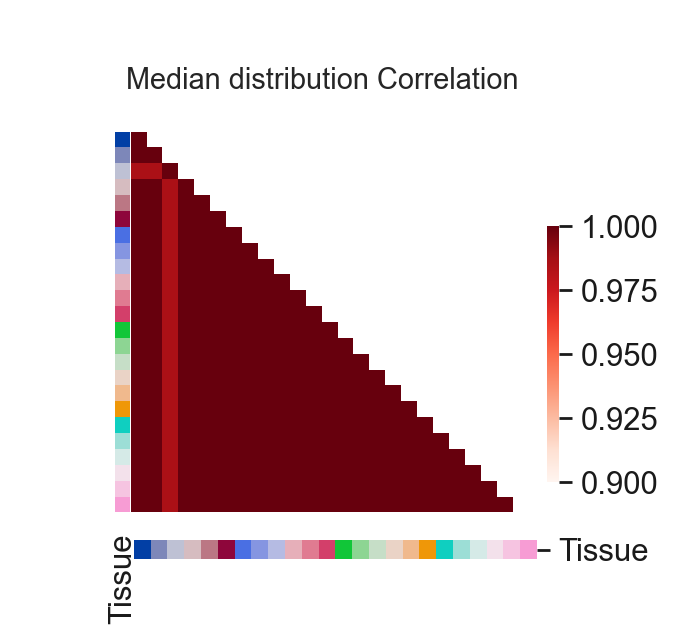

In [157]:
g=sns.clustermap(human_median_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.205, 0.13, 0.63, 0.03]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.fig.suptitle('Median distribution Correlation',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig_median_cor.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_median_cor.pdf",dpi=300,bbox_inches = 'tight')

In [80]:
from scipy import stats
human_mean_pd=pd.DataFrame(index=human_mean.keys())
for i in human_mean.keys():
    human_mean_test=[]
    mu_i=np.mean(human_mean[i])
    sigma_i=np.std(human_mean[i])
    count_i,bins_i=np.histogram(human_mean[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_mean.keys():
        mu_j=np.mean(human_mean[j])
        sigma_j=np.std(human_mean[j])
        count_j,bins_j=np.histogram(human_mean[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_mean_test.append(stats.spearmanr(y_i,y_j)[0])
    human_mean_pd[i]=human_mean_test
human_mean_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Blood,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Bone_Marrow,0.999988,0.999988,1.000000,0.999988,0.999942,0.999872,0.999942,1.000000,0.999988,0.999988,...,0.999988,0.999988,0.999942,1.000000,0.999988,0.999988,0.999942,0.999872,0.999988,0.999767
TS_Eye,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Fat,0.999977,0.999977,0.999942,0.999977,1.000000,0.999977,1.000000,0.999942,0.999977,0.999977,...,0.999977,0.999977,1.000000,0.999942,0.999977,0.999977,1.000000,0.999977,0.999977,0.999895


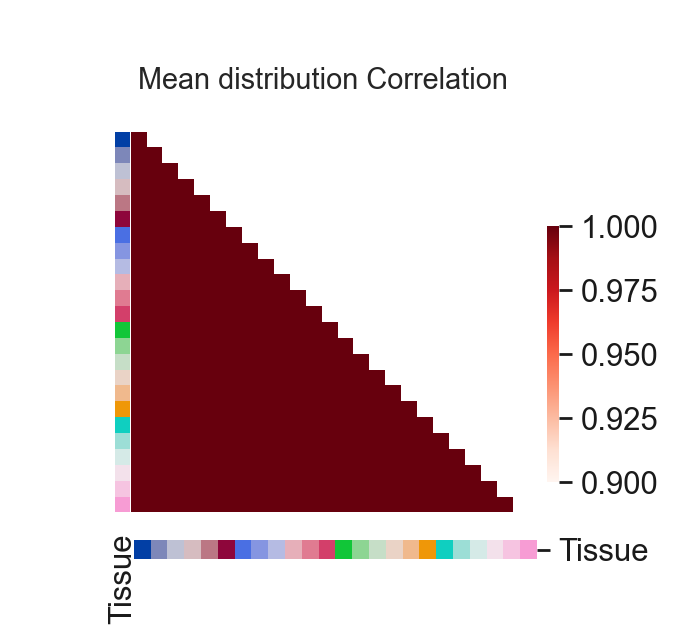

In [156]:
g=sns.clustermap(human_mean_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.9,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.205, 0.13, 0.63, 0.03]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.fig.suptitle('Mean distribution Correlation',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig_mean_cor.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_mean_cor.pdf",dpi=300,bbox_inches = 'tight')

In [82]:
from scipy import stats
human_std_pd=pd.DataFrame(index=human_std.keys())
for i in human_std.keys():
    human_std_test=[]
    mu_i=np.mean(human_std[i])
    sigma_i=np.std(human_std[i])
    count_i,bins_i=np.histogram(human_std[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_std.keys():
        mu_j=np.mean(human_std[j])
        sigma_j=np.std(human_std[j])
        count_j,bins_j=np.histogram(human_std[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_std_test.append(stats.spearmanr(y_i,y_j)[0])
    human_std_pd[i]=human_std_test
human_std_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.998008,0.999348,0.999907,0.998556,0.995574,0.999185,0.998556,0.999639,0.999685,...,0.998928,0.999639,0.999907,0.999639,0.999918,0.998556,0.999185,0.999907,0.999185,0.997740
TS_Blood,0.998008,1.000000,0.999499,0.997286,0.994467,0.990612,0.995515,0.994467,0.996459,0.999115,...,0.999779,0.996459,0.997286,0.996459,0.998614,0.994467,0.995515,0.997286,0.995515,0.993302
TS_Bone_Marrow,0.999348,0.999499,1.000000,0.998835,0.996436,0.992720,0.997379,0.996436,0.998183,0.999930,...,0.999930,0.998183,0.998835,0.998183,0.999709,0.996436,0.997379,0.998835,0.997379,0.995341
TS_Eye,0.999907,0.997286,0.998835,1.000000,0.999138,0.996540,0.999616,0.999138,0.999907,0.999289,...,0.998323,0.999907,1.000000,0.999907,0.999662,0.999138,0.999616,1.000000,0.999616,0.998462
TS_Fat,0.998556,0.994467,0.996436,0.999138,1.000000,0.998975,0.999895,1.000000,0.999592,0.997169,...,0.995713,0.999592,0.999138,0.999592,0.997892,1.000000,0.999895,0.999138,0.999895,0.999884


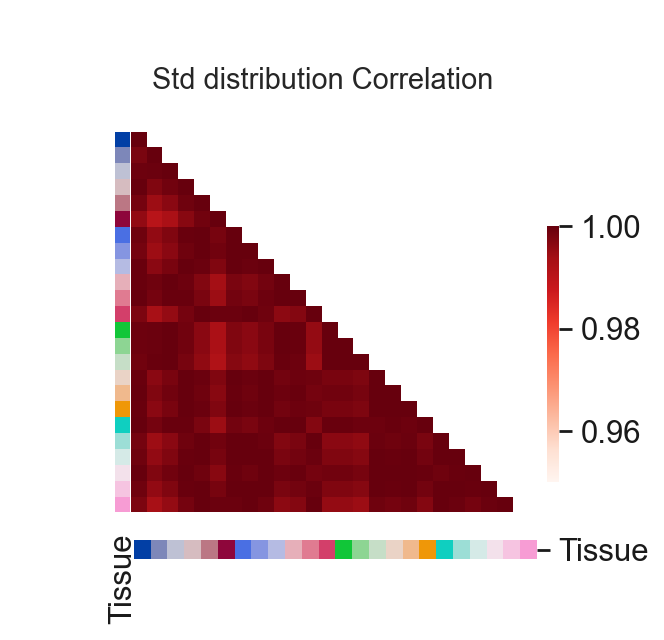

In [155]:
g=sns.clustermap(human_std_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,vmax=1, vmin=0.95,col_cluster=False,row_cluster=False,
                 row_colors=data_df,col_colors=data_df
              )
g.fig.set_size_inches(4, 4)
g.ax_col_colors.set_position([0.205, 0.13, 0.63, 0.03]) 
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.cax.set_position([0.85, 0.25, 0.02, 0.4])  # Adjust the position as needed
g.fig.suptitle('Std distribution Correlation',x=0.5,y=0.9,fontsize=13)
plt.savefig("figures/fig_std_cor.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_std_cor.pdf",dpi=300,bbox_inches = 'tight')

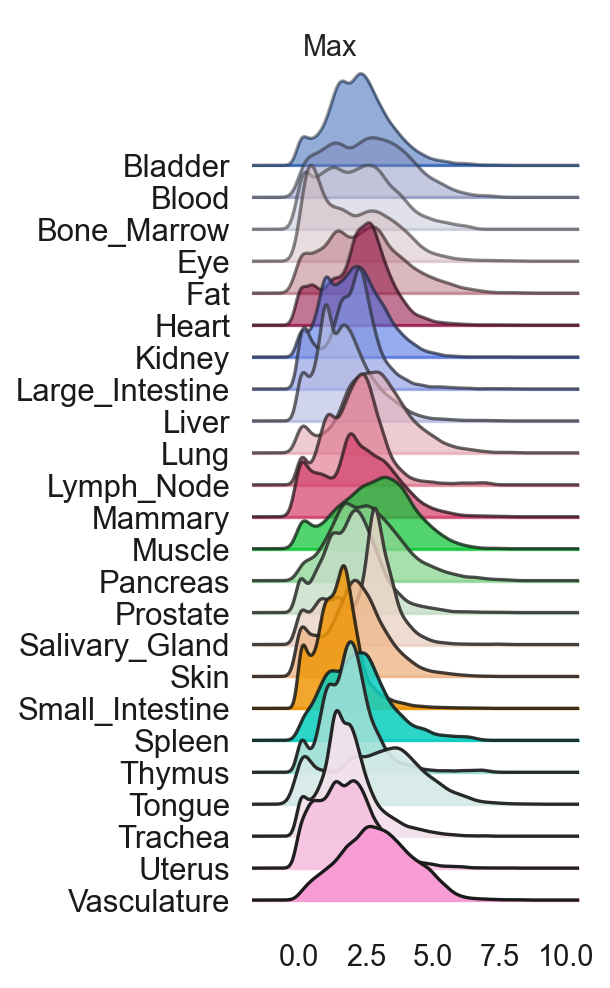

In [181]:
import joypy
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_max.keys():
  df1=pd.DataFrame()
  df1['x']=human_max[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Max',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)
plt.savefig("figures/fig_dis_max.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_dis_max.pdf",dpi=300,bbox_inches = 'tight')

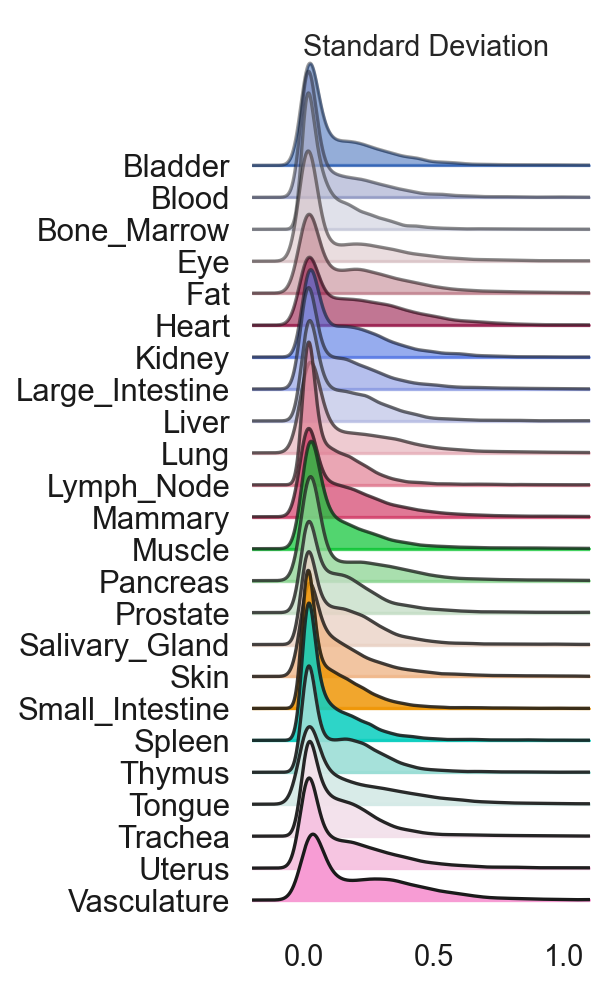

In [178]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_std.keys():
  df1=pd.DataFrame()
  df1['x']=human_std[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,1.1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Standard Deviation',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)
plt.savefig("figures/fig_dis_std.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_dis_std.pdf",dpi=300,bbox_inches = 'tight')    

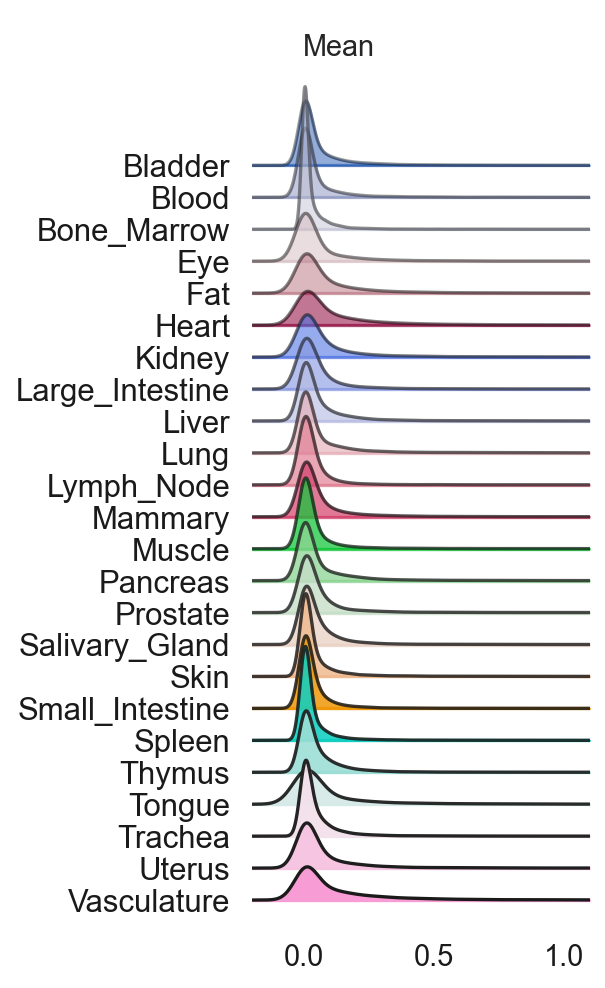

In [179]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_mean.keys():
  df1=pd.DataFrame()
  df1['x']=human_mean[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,1.1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.suptitle('Mean',fontsize=13,y=0.95,horizontalalignment='left') 
plt.xticks(fontsize=13)
plt.savefig("figures/fig_dis_mean.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_dis_mean.pdf",dpi=300,bbox_inches = 'tight')    

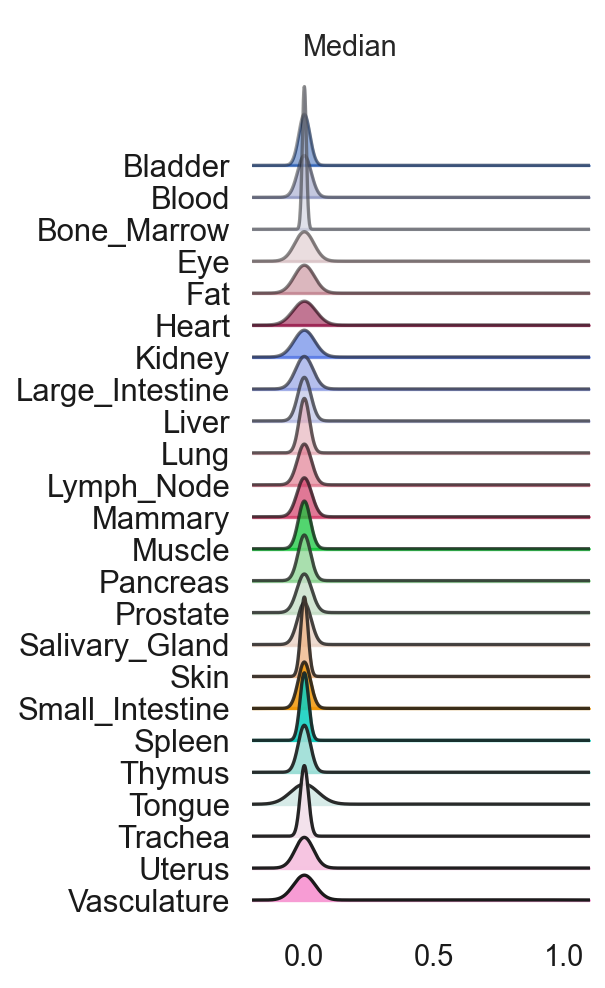

In [180]:
df=pd.DataFrame(columns=['x','g'])
k=0
for i in human_median.keys():
  df1=pd.DataFrame()
  df1['x']=human_median[i]
  df1['g']=[j for j in [i.replace('TS_','')]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=0

import joypy
corr_feature = ['x','g']
corr_df = df[corr_feature]
fig, axes = joypy.joyplot(corr_df,column = 'x', by='g', figsize=(4,6.5),x_range=[-0.2,1.1],
                          fill=True, fade=True,color=sc.pl.palettes.zeileis_28)
plt.xticks(fontsize=13)
#plt.yticks(fontsize=12)
plt.suptitle('Median',fontsize=13,y=0.95,horizontalalignment='left') 
plt.savefig("figures/fig_dis_median.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_dis_median.pdf",dpi=300,bbox_inches = 'tight')    

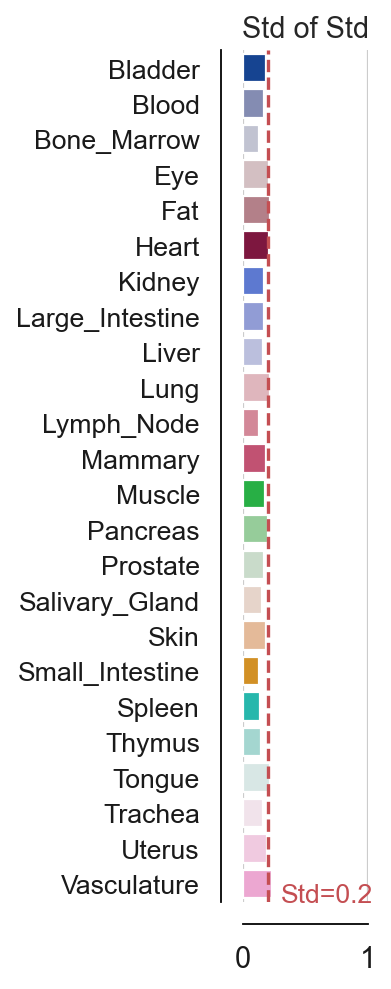

In [186]:
#定义图片大小
pp=plt.figure(figsize=(1,7))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_std.keys():
    y1.append(np.std(human_std[i]))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=0.2, color='r', linestyle='--')
ax.text(0.3,len(human_std.keys())-0.5,'Std=0.2',fontsize=12,color='r')


plt.title('Std of Std',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)
plt.savefig("figures/fig_bar_std.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_bar_std.pdf",dpi=300,bbox_inches = 'tight')    

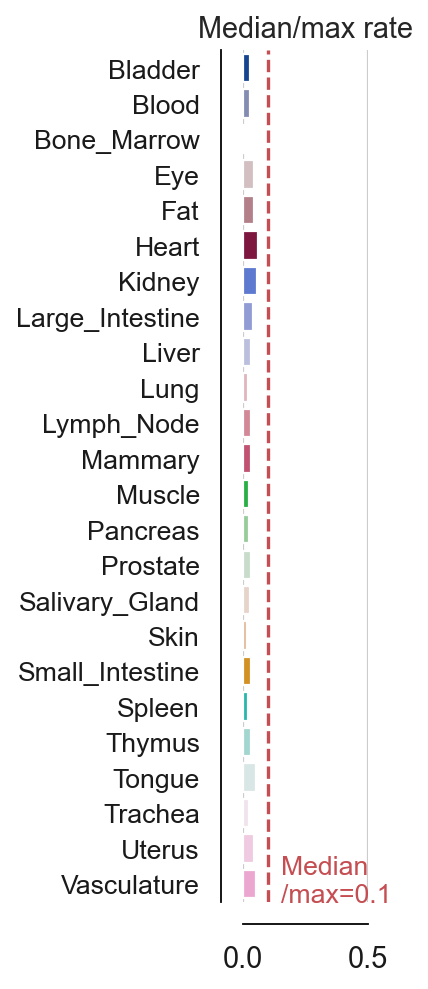

In [187]:
#定义图片大小
pp=plt.figure(figsize=(1,7))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = [i.replace('TS_','') for i in list(human_std.keys())]
y1=[]
for i in human_median.keys():
    y1.append(np.std(np.array(human_median[i])/np.array(human_max[i])))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
# 设置左边和下边的坐标轴线为独立的线段
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim(0,0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.axvline(x=0.1, color='r', linestyle='--')
ax.text(0.15,len(human_std.keys())-0.5,'Median\n/max=0.1',fontsize=12,color='r')


plt.title('Median/max rate',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(fontsize=13)
plt.savefig("figures/fig_bar_median_max.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_bar_median_max.pdf",dpi=300,bbox_inches = 'tight')    

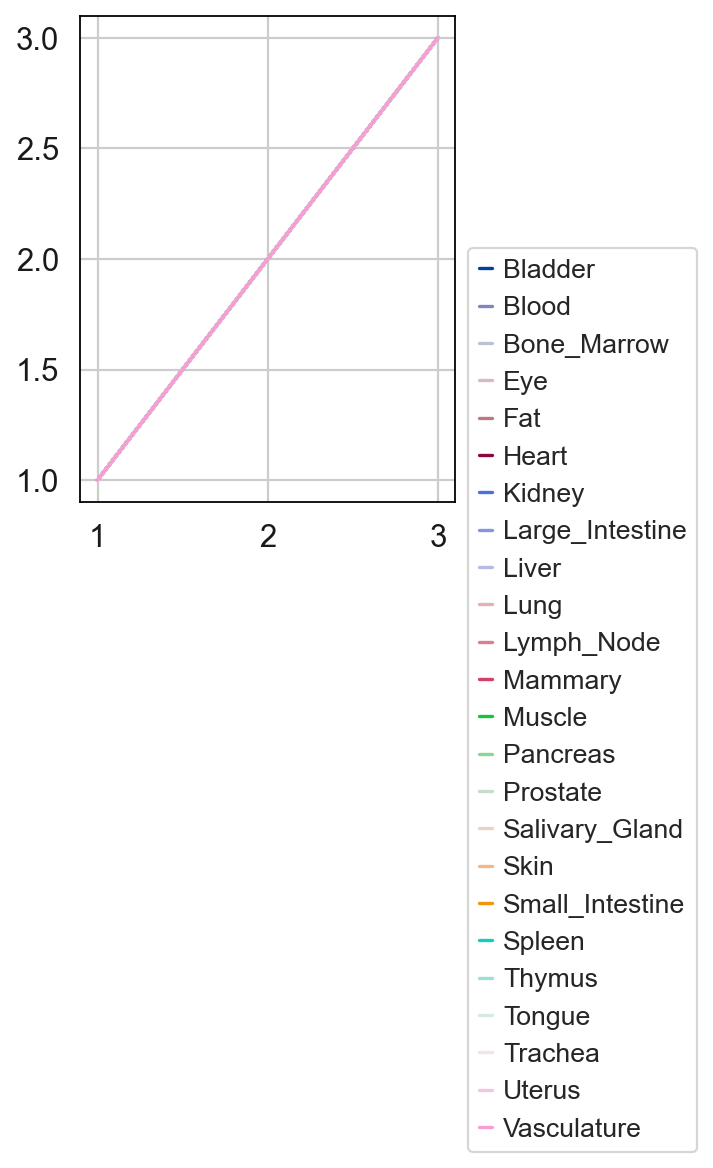

In [185]:
fig, ax = plt.subplots(figsize=(3,4))
for i,j in zip([i.replace('TS_','') for i in list(human_std.keys())],sc.pl.palettes.zeileis_28):
    ax.plot([1,2,3],[1,2,3],label=i,color=j)
plt.legend(bbox_to_anchor=(1, 0.55), ncol=1,fontsize=12)
plt.savefig("figures/fig_legend.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig_legend.pdf",dpi=300,bbox_inches = 'tight')    